# Import

In [1]:
import numpy as np
import pandas as pd

In [20]:
# Text Preprocessing
import string #
import re # Regular Expression
import pprint # Pretty Print for long texts
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
# Feature Engineering

In [3]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# File system
import os
# Warning
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [22]:
data = pd.read_csv('CSV_file/text_emotion.csv')
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


# Exploratory Data Analysis

## No. of Rows

In [8]:
data.shape

(40000, 4)

## Data Type

In [10]:
# data type
data.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

## Missing data

In [11]:
data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

## Keyword

In [14]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

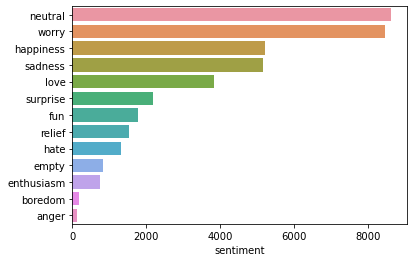

In [19]:
# frequency of sentiment terms
sns.barplot(y=data['sentiment'].value_counts().index, x=data['sentiment'].value_counts())

# Text Data Pre-Processing

In [23]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

## Preprocessor function

In [24]:
def text_preproc(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

data['content'] = data['content'].apply(lambda x: text_preproc(x))
data['content'][:5]

0    tiffanylue know listenin bad habit earlier sta...
1               layin n bed headache ughhhhwaitin call
2                        funeral ceremonygloomy friday
3                              wants hang friends soon
4    dannycastillo want trade someone houston ticke...
Name: content, dtype: object

## Emotions list

In [29]:
# Emotions list
emotions = data['sentiment'].unique().tolist()
emotions

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

## Anger keywords

In [60]:
# Anger list
anger_list = data[data['sentiment']=='anger']['content']
anger_list.value_counts().sum()

110

In [58]:
anger_list = ' '.join(anger_list)
anger_list

'fuckinm transtelecom working fridaaaayyyyy packing dont like tried dye hair got blond chunk front middle part hair dang quotlocked abroadquot makes bein half brown good risk mgmt travelin world blend feel sorry hostage magnet white pepo lougagliardi damned hordies bcollinstattoo yes boo soar throats earaches stomach explode wendys everything tastes good bad rmilana hey wahts happening coffeclub didnt coffee two days dharshana historical jesus ever exist im finding hard prove hearsay accounts bugs lost files since high school hav chance win given free planthave wait till plant grow know anythin never knew dentention hard get drakesizzle dont want come dont come jeeeeez supernatural demon sam need numb pain xxx leahmul awh thats good get better soon stuck stupid jeuno flag wish windy fishing mikeavila ack read show thats horrible accounting taste greenwichlad oh let clarifyknow lots nice people live thought always breeding ground bnp confuzzled toaster oven fault im going look like idio

In [43]:
def unique_words(text):
    text = text.split()
    dict = {}
    for word in text:
        if word in dict:
            dict[word] += 1
        else:
            dict.update({word : 1})
    return dict
anger_tokens = unique_words(anger_list)
anger_tokens

{'fuckinm': 1,
 'transtelecom': 1,
 'working': 1,
 'fridaaaayyyyy': 1,
 'packing': 1,
 'dont': 7,
 'like': 5,
 'tried': 1,
 'dye': 1,
 'hair': 3,
 'got': 5,
 'blond': 1,
 'chunk': 1,
 'front': 2,
 'middle': 1,
 'part': 1,
 'dang': 1,
 'quotlocked': 1,
 'abroadquot': 1,
 'makes': 1,
 'bein': 1,
 'half': 1,
 'brown': 1,
 'good': 5,
 'risk': 1,
 'mgmt': 1,
 'travelin': 1,
 'world': 1,
 'blend': 1,
 'feel': 4,
 'sorry': 3,
 'hostage': 1,
 'magnet': 1,
 'white': 1,
 'pepo': 1,
 'lougagliardi': 1,
 'damned': 1,
 'hordies': 1,
 'bcollinstattoo': 1,
 'yes': 1,
 'boo': 2,
 'soar': 1,
 'throats': 1,
 'earaches': 1,
 'stomach': 1,
 'explode': 1,
 'wendys': 1,
 'everything': 2,
 'tastes': 1,
 'bad': 3,
 'rmilana': 1,
 'hey': 1,
 'wahts': 1,
 'happening': 1,
 'coffeclub': 1,
 'didnt': 2,
 'coffee': 2,
 'two': 2,
 'days': 2,
 'dharshana': 1,
 'historical': 1,
 'jesus': 1,
 'ever': 3,
 'exist': 1,
 'im': 12,
 'finding': 1,
 'hard': 3,
 'prove': 1,
 'hearsay': 1,
 'accounts': 1,
 'bugs': 1,
 'lost': 1

## Anger Plot

In [52]:
anger_keys = list(anger_tokens.keys())
anger_values = list(anger_tokens.values())

<AxesSubplot:>

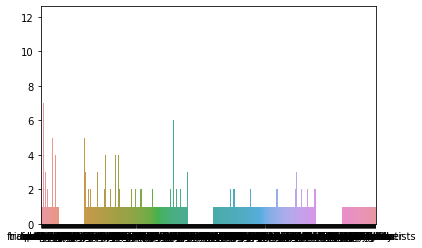

In [54]:
sns.barplot(y=anger_values, x=anger_keys)

# Feature Engineering